In [1]:
import abstention
from abstention.calibration import TempScaling, softmax
import labelshiftexperiments
from labelshiftexperiments import cifarandmnist
from sklearn.calibration import calibration_curve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_labels = cifarandmnist.read_labels(open("test_labels.txt"))
valid_labels = cifarandmnist.read_labels(open("valid_labels.txt"))

In [3]:
test_preds = cifarandmnist.read_preds(open("cifar10_balanced_seed-0_bestbefore-100_currentepoch-100_valacc-91_vgg_testpreds.txt"))
valid_preds = cifarandmnist.read_preds(open("cifar10_balanced_seed-0_bestbefore-100_currentepoch-100_valacc-91_vgg_validpreds.txt"))

In [4]:
uncalibrated = softmax(test_preds, temp=1.0, biases=None)

In [5]:
ts = TempScaling(verbose=False)
calibration_func = ts(valid_preds, valid_labels)
ts_calibrated_counts = calibration_func(test_preds)

In [6]:
bcts = TempScaling(verbose=False, bias_positions='all')
calibration_func = bcts(valid_preds, valid_labels)
bcts_calibrated_counts = calibration_func(test_preds)

In [7]:
class_id = 3
new_y_test = []
ts_scores = []
bcts_scores = []
uncalib_preds = []
for idx in range(len(test_labels)):
    new_y_test.append(test_labels[idx][class_id])
    uncalib_preds.append(uncalibrated[idx][class_id])
    ts_scores.append(ts_calibrated_counts[idx][class_id])
    bcts_scores.append(bcts_calibrated_counts[idx][class_id])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


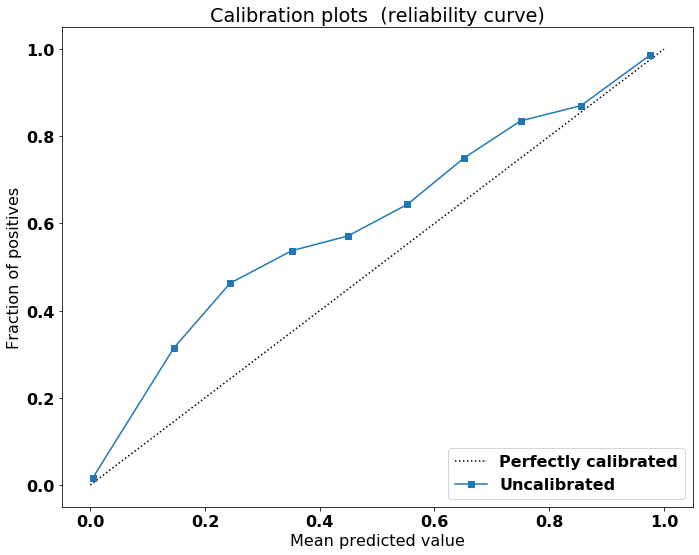

In [8]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font)
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for name, preds in [("Uncalibrated", uncalib_preds)]:
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(new_y_test, preds, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots  (reliability curve)')

plt.tight_layout()
plt.show()

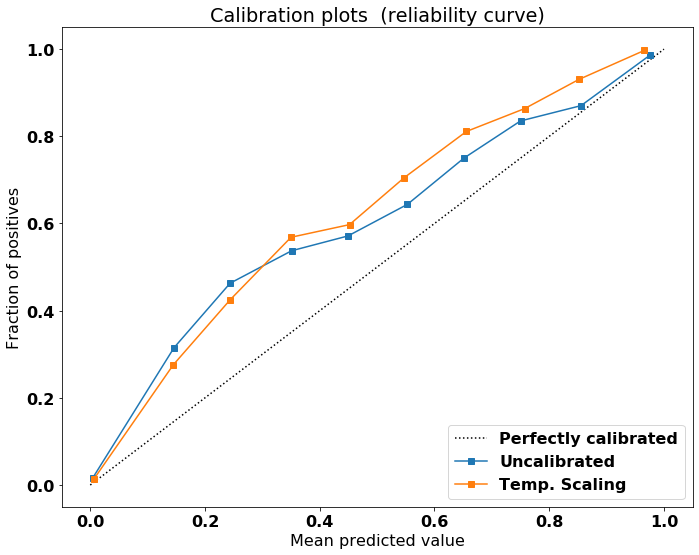

In [9]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font)
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for name, preds in [("Uncalibrated", uncalib_preds), ("Temp. Scaling", ts_scores)]:
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(new_y_test, preds, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots  (reliability curve)')

plt.tight_layout()
plt.show()

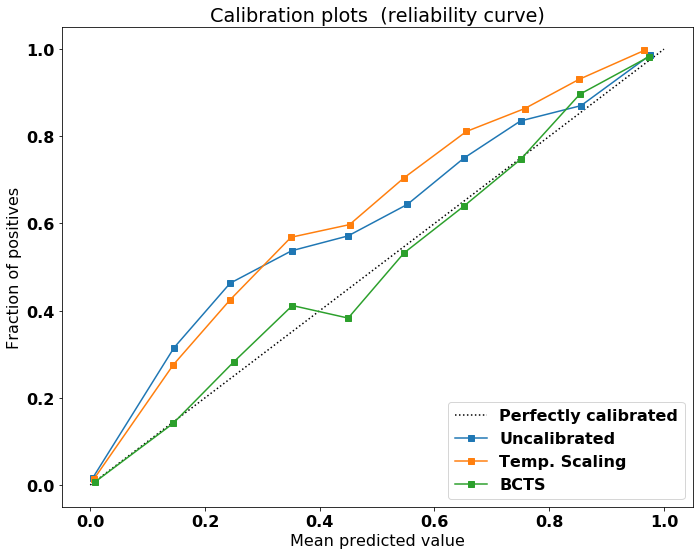

In [10]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font)
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for name, preds in [("Uncalibrated", uncalib_preds), ("Temp. Scaling", ts_scores), ("BCTS", bcts_scores)]:
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(new_y_test, preds, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots  (reliability curve)')

plt.tight_layout()
plt.show()